<a href="https://colab.research.google.com/github/David-Kumawat/Capstone_Project-AirBnb_Bookings_Analysis/blob/main/Capstone_EDA_Project_AirBnb_Bookings_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Project Name -** AirBnb Bookings Analysis

##### **Project Type** - EDA (Exploratory Data Analysis)
##### **Contribution** - Individual

# **Project Summary-**


**AirBnb Bookings Analysis Project Overview:**

I, David Kumawat, undertook a solo project analyzing AirBnb bookings using a dataset obtained in CSV format. To conduct the analysis, I leveraged key Python libraries, including pandas, numpy, seaborn, and matplotlib. The project was executed in Google Colab, where I mounted my drive, retrieved the file path, and utilized the `read_csv()` function to load the dataset.

**Data Exploration:**

- I initiated the analysis by examining the structure of the dataset, which comprised around 49,000 observations across 16 columns.
- Notable insights from the initial data exploration included identifying 10 numerical columns and 6 categorical columns.
- I systematically checked for duplicate and null values, ensuring data integrity.

**Data Wrangling:**

- Addressing null values, I opted to replace them with zeros, aligning with the context of the dataset.
- I strategically dropped unnecessary columns, such as 'host_name,' 'name,' and 'last_review,' streamlining the dataset.
- Instances with a price value of zero were excluded for analytical precision.

**Outlier Handling:**

- I meticulously examined outliers, revealing an anomaly in the 'minimum_night' column.
- Employing the IQR (Interquartile Range) method, I identified and excluded outliers, enhancing data quality.
- A subsequent visualization using boxplots corroborated the successful handling of outliers.

**Correlation Analysis:**

- A correlation matrix was constructed to uncover relationships between different columns, providing valuable insights into data patterns.

**Problem Solving and Visualization:**

- I addressed several problem statements, deriving actionable insights from the dataset.
- Visualizations, including charts and graphs, were crafted to succinctly convey analytical findings.
- I documented key details of each visualization, enhancing the interpretability of the analysis.

**Conclusion:**

In conclusion, this AirBnb Bookings Analysis project encompassed a comprehensive data exploration, effective data wrangling techniques, and strategic outlier handling. The correlation analysis and subsequent problem-solving exercises contributed to a deeper understanding of the dataset. Visualization played a pivotal role in presenting key findings, ensuring clarity and communicability of the analytical insights.

# **GitHub Link-**

https://github.com/David-Kumawat/Capstone_Project-AirBnb_Bookings_Analysis

# **Problem Statement**

### **Problem 1. On which Location maximum number of listings?**
### **Problem 2. The Highest listing is done by a host.**
### **Problem 3. Which room type is highest listed on which location.**
### **Problem 4. Top 5 highest listing neighbourhood(Area).**
### **Problem 5. What are the average prices preferred by the customer for neighbourhood_group and each room_type(listing type)?**
### **Problem 6. neighbourhood(Area) with maximum average price.**
### **Problem 7. Top 10 Cheap neighbourhood(Area).**
### **Problem 8. Where is the highest room availability in neighbourhood_groups(Location)?**
### **Problem 9. Relation between price variable with another variable.**

#### **Define Your Business Objective?**

 **Since 2008, guests and hosts have used Airbnb to expand on travelling possibilities and present a more unique, personalised way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings Provided through AirBnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analysed and used for security, business decisions, understanding of customers and provides (hosts) behaviour and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more.**

 **This dataset has around 49,000 observations in it with 16 columns and it is a mix of categorical and numeric values.**

**Explore and analyse the data to discover key understandings.**

## **1. Know your data**

In [1]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Mounting Drive

from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
# Loading dataset

path = "/content/drive/MyDrive/Capstone Project(EDA)/Airbnb NYC 2019.csv"
df = pd.read_csv(path)

In [4]:
# Inspecting the first five rows from the dataset

df.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

In [5]:
# Inspecting the last five rows from the dataset

df.tail()

id                                               name   host_id  \
48890  36484665    Charming one bedroom - newly renovated rowhouse   8232441   
48891  36485057      Affordable room in Bushwick/East Williamsburg   6570630   
48892  36485431            Sunny Studio at Historical Neighborhood  23492952   
48893  36485609               43rd St. Time Square-cozy single bed  30985759   
48894  36487245  Trendy duplex in the very heart of Hell's Kitchen  68119814   

           host_name neighbourhood_group       neighbourhood  latitude  \
48890        Sabrina            Brooklyn  Bedford-Stuyvesant  40.67853   
48891        Marisol            Brooklyn            Bushwick  40.70184   
48892  Ilgar & Aysel           Manhattan              Harlem  40.81475   
48893            Taz           Manhattan      Hell's Kitchen  40.75751   
48894     Christophe           Manhattan      Hell's Kitchen  40.76404   

       longitude        room_type  price  minimum_nights  number_of_reviews  \
48890  -73.94995     Private room     70               2                  0   
48891  -73.93317     Private room     40               4                  0   
48892  -73.94867  Entire home/apt    115              10                  0   
48893  -73.99112      Shared room     55               1                  0   
48894  -73.98933     Private room     90               7                  0   

      last_review  reviews_per_month  calculated_host_listings_count  \
48890         NaN                NaN                               2   
48891         NaN                NaN                               2   
48892         NaN                NaN                               1   
48893         NaN                NaN                               6   
48894         NaN                NaN                               1   

       availability_365  
48890                 9  
48891                36  
48892                27  
48893                 2  
48894                23

In [6]:
# Printing shape of the dataframe

print(df.shape)

(48895, 16)


In [7]:
# Information of the dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

**This data not have any duplicate value**

In [8]:
# Dataset Duplicate Value Count

df.duplicated().sum()

0

In [9]:
# Checking each columns for null values

df.isnull().sum().sort_values(ascending=False)

last_review                       10052
reviews_per_month                 10052
host_name                            21
name                                 16
id                                    0
host_id                               0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64

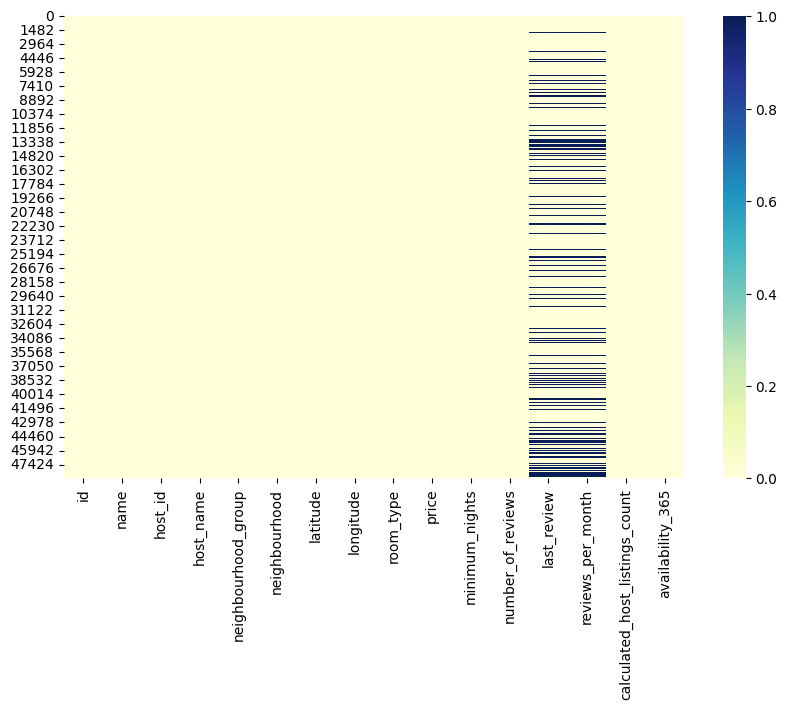

In [10]:
# Visualizing the null values in dataframe by using heatmap

plt.figure(figsize=(10,6))
sns.heatmap(df.isna(),cmap="YlGnBu")
plt.show()

###what did you know about your dataset?

**Answer:** In the dataset there are 48895 rows and 16 columns, Each row contains a different listing, the dataset has 10 numerical and 6 Object type columns, And columns(name, host_name, last_review, and reviews_per_month) have null values. most of the null values are in last_review and reviews_per_month. Columns(id, host_id ) have unique id's. there are five different neighbourhood_groups(locations) Brooklyn, Manhattan, Queens, Staten Island, and Bronx, and each neighbourhood_group has different neighbourhoods(Area). and in data, there are three different rooms ['Private room', 'Entire home/apt', 'Shared room'].

## **2. Uderstanding Your Variables**



In [11]:
# Printing dataset columns

print(df.columns)

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')


In [12]:
# description of the data

df.describe()

id       host_id      latitude     longitude         price  \
count  4.889500e+04  4.889500e+04  48895.000000  48895.000000  48895.000000   
mean   1.901714e+07  6.762001e+07     40.728949    -73.952170    152.720687   
std    1.098311e+07  7.861097e+07      0.054530      0.046157    240.154170   
min    2.539000e+03  2.438000e+03     40.499790    -74.244420      0.000000   
25%    9.471945e+06  7.822033e+06     40.690100    -73.983070     69.000000   
50%    1.967728e+07  3.079382e+07     40.723070    -73.955680    106.000000   
75%    2.915218e+07  1.074344e+08     40.763115    -73.936275    175.000000   
max    3.648724e+07  2.743213e+08     40.913060    -73.712990  10000.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    48895.000000       48895.000000       38843.000000   
mean         7.029962          23.274466           1.373221   
std         20.510550          44.550582           1.680442   
min          1.000000           0.000000           0.010000   
25%          1.000000           1.000000           0.190000   
50%          3.000000           5.000000           0.720000   
75%          5.000000          24.000000           2.020000   
max       1250.000000         629.000000          58.500000   

       calculated_host_listings_count  availability_365  
count                    48895.000000      48895.000000  
mean                         7.143982        112.781327  
std                         32.952519        131.622289  
min                          1.000000          0.000000  
25%                          1.000000          0.000000  
50%                          1.000000         45.000000  
75%                          2.000000        227.000000  
max                        327.000000        365.000000

# Variables Description

###**1.** In data frame columns is used for represent element address.
###**2.** The minimum price is 0 which is unlikely
###**3.** The Maximum minimum_nights is 1250, which is not appropriate
###**4.** Last_review and reviews_per_month columns have same number NaN values and they are connected, hence when the data missing in last_review column the values in reviews_per_month also missing
###**5.** Columns price and minimum_nights also connected columns
###**6.** Id and host_id is independend columns
###**7.** Columns id, host_id, latitude, longitude, price, minimum_nights, number_of_reviews, review_per_month, calculated_host_listings_count, availability_365 this columns are numerical and Columns name, host_name, neighbourhood_group, neighbourhood, room_type, last_review this are object type columns.

###Check unique value for each variable

In [13]:
# Checking all variable for unique value

unique_counts = df.nunique()
unique_counts

id                                48895
name                              47905
host_id                           37457
host_name                         11452
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64

#**3. Data** **Wrangling**

###Data Wrangling Code

In [14]:
# checking how many null values in dataframe

df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [15]:
# Columns like name, host_name, last_review are not important columns. therefore I am droping these columns

df.drop(['name','host_name','last_review'],axis=1,inplace=True)

In [16]:
# show

df.head()

id  host_id neighbourhood_group neighbourhood  latitude  longitude  \
0  2539     2787            Brooklyn    Kensington  40.64749  -73.97237   
1  2595     2845           Manhattan       Midtown  40.75362  -73.98377   
2  3647     4632           Manhattan        Harlem  40.80902  -73.94190   
3  3831     4869            Brooklyn  Clinton Hill  40.68514  -73.95976   
4  5022     7192           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews  \
0     Private room    149               1                  9   
1  Entire home/apt    225               1                 45   
2     Private room    150               3                  0   
3  Entire home/apt     89               1                270   
4  Entire home/apt     80              10                  9   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

**Now only null values exist in the reviews_per_month column**

In [17]:
# Replacing all null values with zero

df.replace(np.NaN,0,inplace=True)

In [19]:
# Checking there is a null value or not

df.isnull().sum()

id                                0
host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [20]:
# Summary of the data

df.describe()

id       host_id      latitude     longitude         price  \
count  4.889500e+04  4.889500e+04  48895.000000  48895.000000  48895.000000   
mean   1.901714e+07  6.762001e+07     40.728949    -73.952170    152.720687   
std    1.098311e+07  7.861097e+07      0.054530      0.046157    240.154170   
min    2.539000e+03  2.438000e+03     40.499790    -74.244420      0.000000   
25%    9.471945e+06  7.822033e+06     40.690100    -73.983070     69.000000   
50%    1.967728e+07  3.079382e+07     40.723070    -73.955680    106.000000   
75%    2.915218e+07  1.074344e+08     40.763115    -73.936275    175.000000   
max    3.648724e+07  2.743213e+08     40.913060    -73.712990  10000.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    48895.000000       48895.000000       48895.000000   
mean         7.029962          23.274466           1.090910   
std         20.510550          44.550582           1.597283   
min          1.000000           0.000000           0.000000   
25%          1.000000           1.000000           0.040000   
50%          3.000000           5.000000           0.370000   
75%          5.000000          24.000000           1.580000   
max       1250.000000         629.000000          58.500000   

       calculated_host_listings_count  availability_365  
count                    48895.000000      48895.000000  
mean                         7.143982        112.781327  
std                         32.952519        131.622289  
min                          1.000000          0.000000  
25%                          1.000000          0.000000  
50%                          1.000000         45.000000  
75%                          2.000000        227.000000  
max                        327.000000        365.000000

In [21]:
# The price column having zero which not appropriate. Therefore I am keeping only those observations which are not have any zero value in the price column

df = df[df['price']>0]

In [22]:
# Summary of the data
df.describe()

id       host_id      latitude     longitude         price  \
count  4.888400e+04  4.888400e+04  48884.000000  48884.000000  48884.000000   
mean   1.901679e+07  6.762203e+07     40.728953    -73.952176    152.755053   
std    1.098432e+07  7.861666e+07      0.054532      0.046159    240.170260   
min    2.539000e+03  2.438000e+03     40.499790    -74.244420     10.000000   
25%    9.470548e+06  7.817310e+06     40.690100    -73.983080     69.000000   
50%    1.967574e+07  3.079257e+07     40.723080    -73.955685    106.000000   
75%    2.915297e+07  1.074344e+08     40.763120    -73.936290    175.000000   
max    3.648724e+07  2.743213e+08     40.913060    -73.712990  10000.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    48884.000000       48884.000000       48884.000000   
mean         7.029887          23.271991           1.090800   
std         20.512224          44.551331           1.597213   
min          1.000000           0.000000           0.000000   
25%          1.000000           1.000000           0.040000   
50%          3.000000           5.000000           0.370000   
75%          5.000000          24.000000           1.580000   
max       1250.000000         629.000000          58.500000   

       calculated_host_listings_count  availability_365  
count                    48884.000000      48884.000000  
mean                         7.144628        112.779498  
std                         32.956185        131.627271  
min                          1.000000          0.000000  
25%                          1.000000          0.000000  
50%                          1.000000         45.000000  
75%                          2.000000        227.000000  
max                        327.000000        365.000000

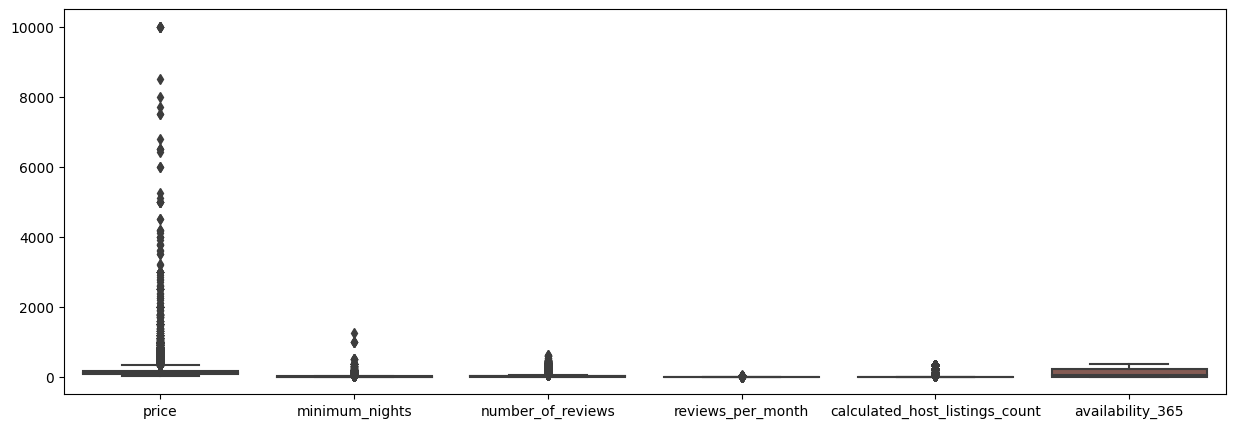

In [27]:
# Creating List of Numeric Columns
columns = ['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']

plt.figure(figsize=(15,5))
# Creating a boxplot for variables
sns.boxplot(data=df[columns])

# Show the plot
plt.show()

In [28]:
# Making a copy of dataframe
test_df = df.copy()

In [ ]:
# IQR (Interquartile Range) to remove outliers
Q1 = test_df.quantile(0.25)
Q3 = test_df.quantile(0.75)
IQR = Q3 - Q1
df_without_outliers = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [30]:
# Checking Summary of the data
df_without_outliers.describe()

id       host_id      latitude     longitude        price  \
count  2.733100e+04  2.733100e+04  27331.000000  27331.000000  27331.00000   
mean   1.831233e+07  5.254159e+07     40.729080    -73.957235    121.97351   
std    1.032846e+07  6.446881e+07      0.052652      0.028947     66.73406   
min    2.595000e+03  2.571000e+03     40.580780    -74.039420     10.00000   
25%    9.395785e+06  6.931238e+06     40.690400    -73.981560     70.00000   
50%    1.894382e+07  2.437479e+07     40.720820    -73.955570    100.00000   
75%    2.719835e+07  7.137750e+07     40.763795    -73.939955    160.00000   
max    3.648724e+07  2.568573e+08     40.872470    -73.866330    334.00000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    27331.000000       27331.000000       27331.000000   
mean         2.942227           9.809411           0.608373   
std          1.976220          13.257660           0.842879   
min          1.000000           0.000000           0.000000   
25%          1.000000           1.000000           0.030000   
50%          2.000000           4.000000           0.230000   
75%          4.000000          13.000000           0.850000   
max         11.000000          58.000000           3.890000   

       calculated_host_listings_count  availability_365  
count                    27331.000000      27331.000000  
mean                         1.249790         63.551535  
std                          0.543251        108.100500  
min                          1.000000          0.000000  
25%                          1.000000          0.000000  
50%                          1.000000          0.000000  
75%                          1.000000         83.000000  
max                          3.000000        365.000000

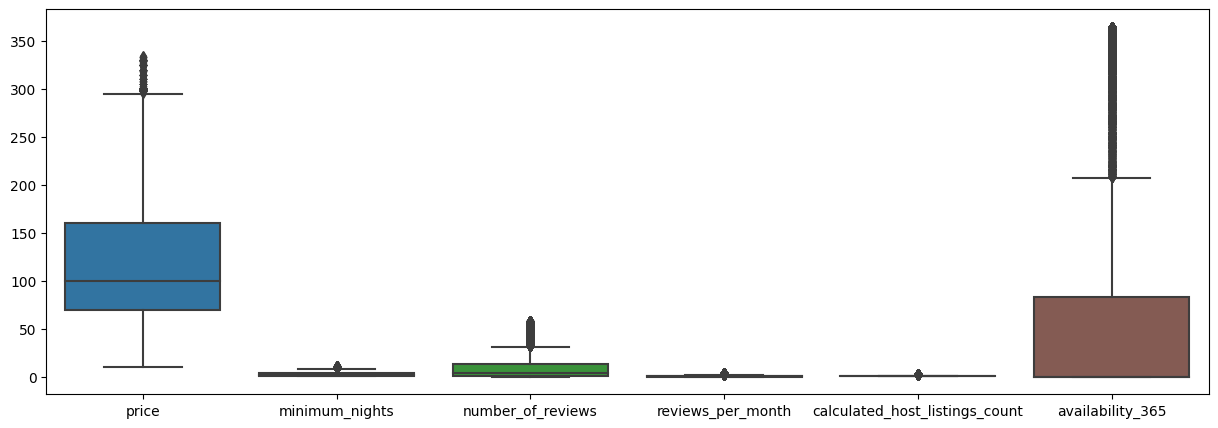

In [32]:
#Creating boxplot after removed the outliers
plt.figure(figsize=(15,5))
sns.boxplot(data = df_without_outliers[columns])
plt.show()

###What all manipulations have you done and what insights you found

**Answer:-** I checked the null values in the data frame, and I replaced this null value with zero, After that I found some columns that wouldn't be used, So I dropped those columns(name, host_name, last_review). and I remove those listings whose price is 0. and then I remove outliers from the data with the help of the IQR technique.

#**Data Visualization, Storytelling & Experimenting with charts : Understand the relationships between variables**

# Correlation between variables

###From the below correlation matrix we come to know that the number_of_reviews and reviews_per_month are highly correlated variables as compared to other variable.

In [33]:
# I'm taking only those columns which are numerical

num_col = ['id','host_id','latitude','longitude','price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']

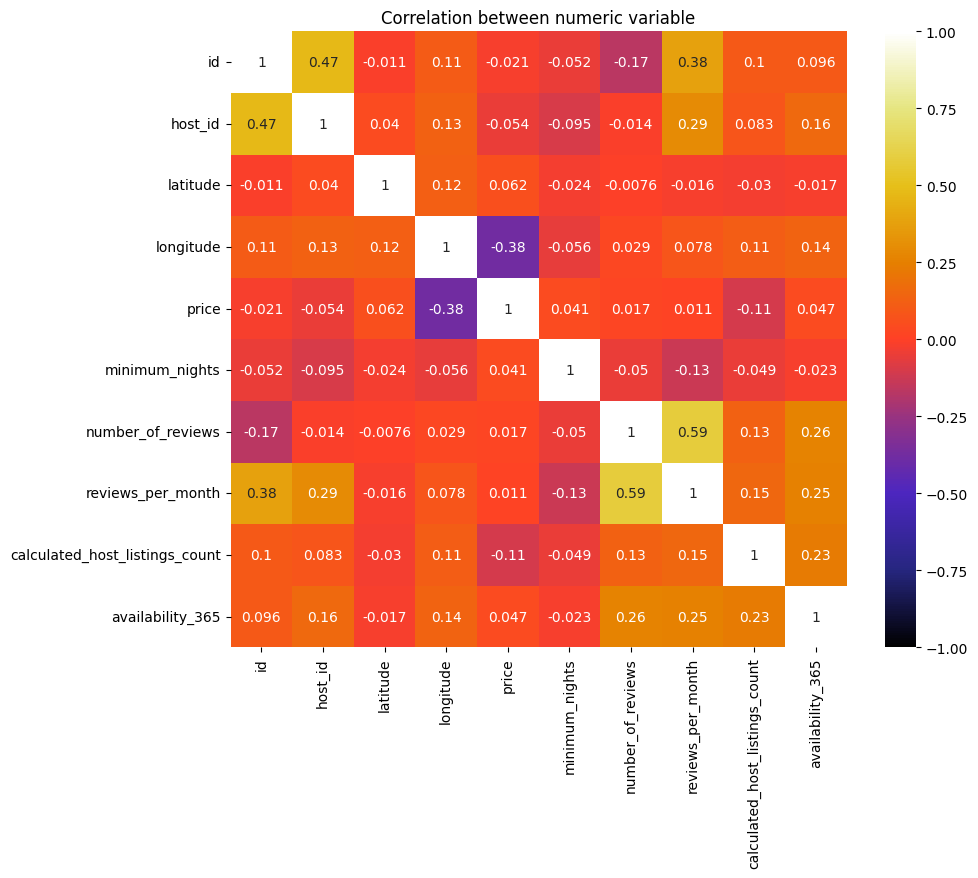

In [34]:
# Fixing the size for chart
plt.figure(figsize=(10,8))

sns.heatmap(df_without_outliers[num_col].corr(), cmap=plt.cm.CMRmap, vmin=-1, vmax=1, annot=True, square=True)
plt.title("Correlation between numeric variable")
plt.show()


* Here we can see reviews_per_month and number_of_reviews are having highest correlation 0.59.


### **Problem 1. On which location maximum number of listings?**

In [35]:
neighbourhood_group = df_without_outliers.groupby('neighbourhood_group')['id'].count().reset_index().rename(columns={'id':'count_of_listing'}).sort_values(by='count_of_listing',ascending=False)
neighbourhood_group

neighbourhood_group  count_of_listing
1            Brooklyn             12876
2           Manhattan             11967
3              Queens              2131
0               Bronx               357

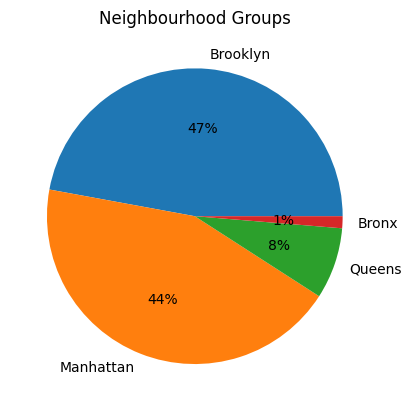

In [36]:
# Visualization
plt.pie(neighbourhood_group['count_of_listing'],labels=neighbourhood_group['neighbourhood_group'],autopct="%.0f%%")
plt.title('Neighbourhood Groups')
plt.show()

###1. Why did you pick the specific chart?



**Answer** The pie chart displays clear precipitation from the chart.

###2. what is /are insight(s) found from the chart?

**Answer:** In Brooklyn and Manhattan highest listings are. because most of the crowd went on vacation or for work in two locations.

### 3. Will the gained insights help creating a positive business impact?
###Are there any insights that lead to negative growth? Justify with specific reason.

**Answer:** Brooklyn and Manhattan are providing a positive impact on the business.

* **Scatter Plot**

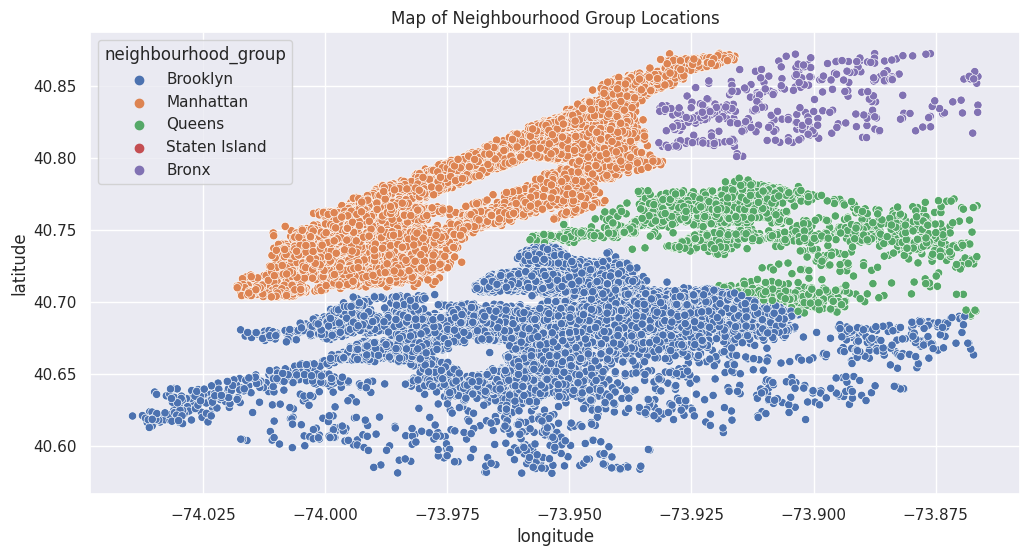

In [37]:
# Visualization
sns.set(rc={"figure.figsize":(12,6)})
sns.scatterplot(x=df_without_outliers['longitude'],y=df_without_outliers['latitude'],hue=df['neighbourhood_group'])
plt.title('Map of Neighbourhood Group Locations')
plt.show()

###**Problem 2. The Highest listing is done by a host.**


In [38]:
# Only taking ten rows
host_listing_df = df_without_outliers.host_id.value_counts().reset_index().rename(columns={"index":"host_id","host_id":"count_of_listing"}).sort_values(by='count_of_listing',ascending=False).head(10)
host_listing_df

host_id  count_of_listing
0     14482375                 3
225   32865595                 3
223   26521212                 3
222    3249903                 3
221   43908809                 3
220    1678704                 3
219  146675319                 3
218     117287                 3
217  154266431                 3
216     436365                 3

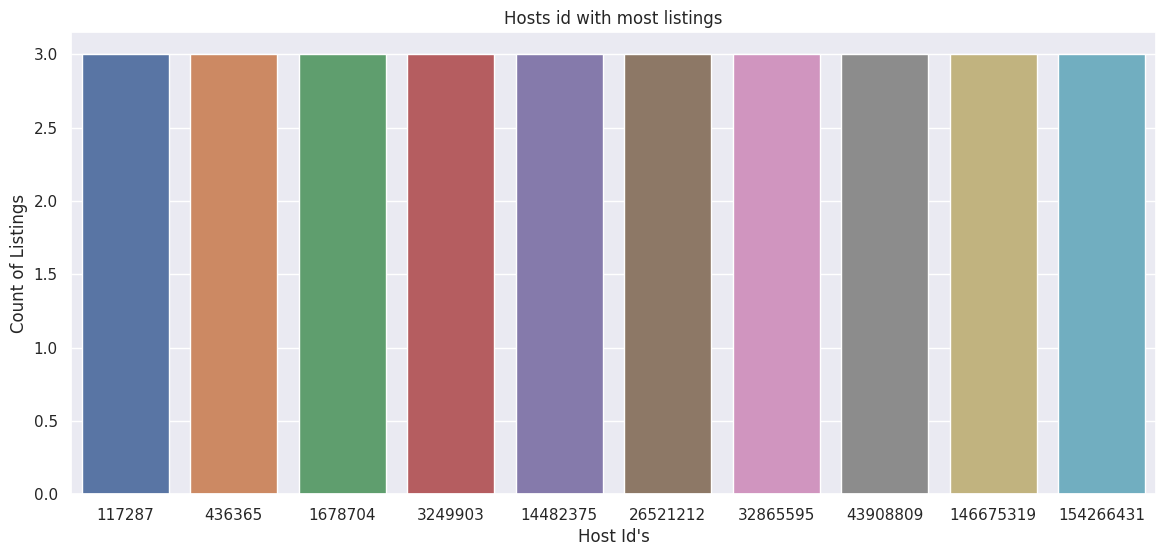

In [39]:
# Fixing the size of the chart
sns.set(rc={"figure.figsize":(14,6)})

# storing into a variable
fig = sns.barplot(x='host_id',y='count_of_listing',data=host_listing_df)
fig.set_title("Hosts id with most listings")
fig.set_xlabel("Host Id's")
fig.set_ylabel("Count of Listings")
plt.show()

###1. Why did you pick the specific chart?




**Answer:** Barchart gives better understanding recognize patterns and trends

###2. what is /are insight(s) found from the chart?

**Answer:** The Highest listing done by a host is 3, which makes sense.

### 3. Will the gained insights help creating a positive business impact?
###Are there any insights that lead to negative growth? Justify with specific reason.

**Answer:**

###**Problem 3. Which room type is highest listed on which location.**

In [40]:
# Getting dataframe which having all room counts based on location

listing_type = df_without_outliers.groupby(['neighbourhood_group','room_type'])['id'].count().unstack()
listing_type

room_type            Entire home/apt  Private room  Shared room
neighbourhood_group                                            
Bronx                            107           232           18
Brooklyn                        5969          6753          154
Manhattan                       6790          4913          264
Queens                           827          1244           60

In [41]:
#importing matplotlib.pyplot
import matplotlib.pyplot as plt

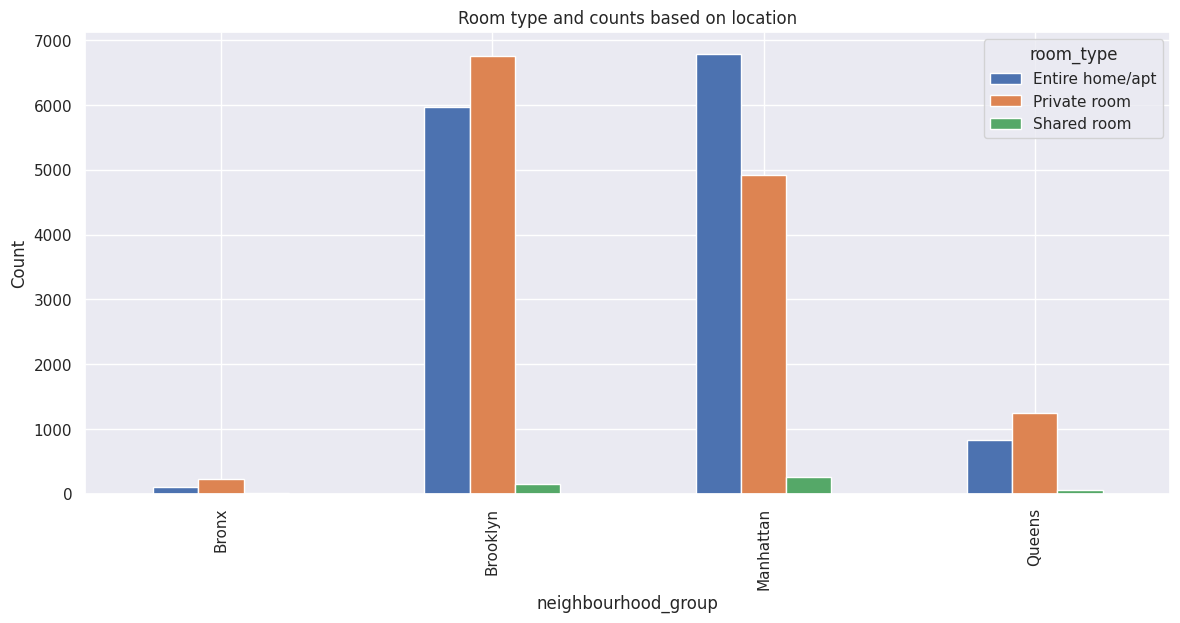

In [42]:
# Visualization

listing_type.plot(kind='bar')
plt.title("Room type and counts based on location")
plt.ylabel('Count')
plt.show()

###1. Why did you pick the specific chart?

**Answer:** A Bar Chart makes it easy to compare and display the distribution or relationship between data points.

###2. what is /are insight(s) found from the chart?

**Answer:-**

**1.** Listing of all homes/apartments is the highest in Manhattan. While Brooklyn has a private room listing at the highest the Entire home and apt listing is not far away.

**2.** It can be observed Shared rooms have few listings in each location.

**3.** The most of people are prefered to book home/apartment and privite room, they don't want to live in share.

### 3. Will the gained insights help creating a positive business impact?
###Are there any insights that lead to negative growth? Justify with specific reason.

**Answer:** It will impact positively because there are fewer listings in shared rooms and when people don't get a free shared room, then they will book a private room. And private room prices are high compared to shared rooms, so it is good for business from a point of view.



###**Problem 4. Top 5 highest listing neighbourhood(areas).**

In [43]:
# Checking each neighbourhood_group has which neighbourhood and count of the listing in each neighbourhood
ne = df_without_outliers.groupby(['neighbourhood_group','neighbourhood'])['id'].count()

In [44]:
# Setting the number of rows displayed to 200
pd.options.display.max_rows = 200
ne

neighbourhood_group  neighbourhood            
Bronx                Allerton                        1
                     Belmont                        19
                     Bronxdale                       9
                     Claremont Village              15
                     Clason Point                    2
                     Concourse                      38
                     Concourse Village              24
                     East Morrisania                 4
                     Fordham                        33
                     Highbridge                     16
                     Hunts Point                     5
                     Kingsbridge                    10
                     Longwood                       39
                     Melrose                         9
                     Morris Heights                 12
                     Morrisania                     12
                     Mott Haven                     35
                  

In [45]:
# creating a data frame which having maximum listings by area

max_listing_area = df_without_outliers.groupby('neighbourhood')['id'].count().reset_index().sort_values(by='id',ascending=False).head(5)
max_listing_area.rename(columns={'neighbourhood':'Neighbourhood','id':'Total_listings'},inplace=True)
max_listing_area

Neighbourhood  Total_listings
115        Williamsburg            2782
5    Bedford-Stuyvesant            2198
56               Harlem            1670
15             Bushwick            1608
41         East Village            1234

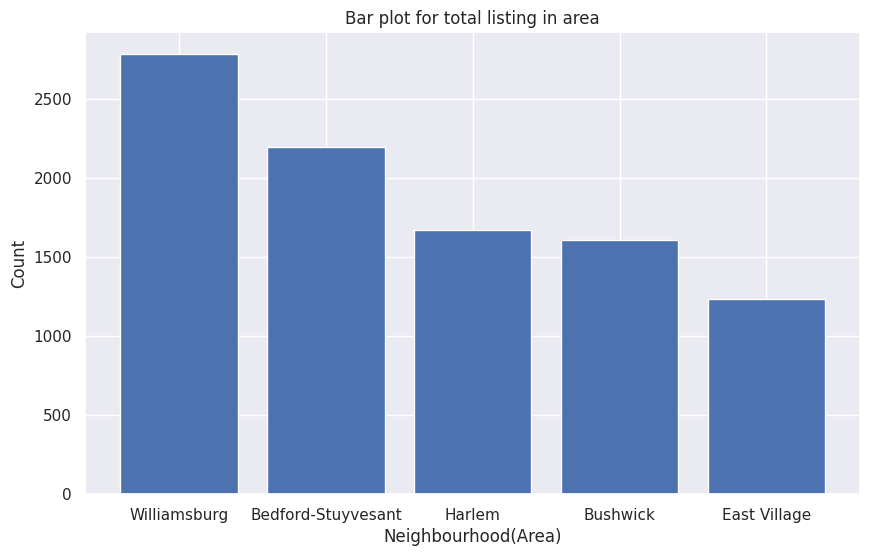

In [46]:
# Creating a visualization for neighbourhood(area) with highest listing
# Fixing the size
plt.figure(figsize=(10,6))

plt.bar(max_listing_area.Neighbourhood.values,max_listing_area.Total_listings.values,align='center')
plt.title('Bar plot for total listing in area')
plt.xlabel('Neighbourhood(Area)')
plt.ylabel('Count')
# plt.tight_layout()
plt.show()

###1. Why did you pick the specific chart?

**Answer:** A Bar chart makes it easy to compare and display the distribution or relationship between data points.

###2. what is /are insight(s) found from the chart?

**Answer:-**

Williamsburg has the highest listing then Bedford-Stuyvesant, Harlem, Bushwick, and East Village have the top five listings, maybe because in this area a lot of people visit.

### 3. Will the gained insights help creating a positive business impact?
###Are there any insights that lead to negative growth? Justify with specific reason.

**Answer:**

###**Problem 5.What are the average prices preferred by the customer for neighbourhood_group and each room type(listing type)?**

In [47]:
# I am getting the average price for each room and for each neighbourhood_group(location) and store in a dataframe
avg_pref_price = df_without_outliers.groupby(['neighbourhood_group','room_type'])['price'].mean().reset_index()

#print the dataframe
avg_pref_price

neighbourhood_group        room_type       price
0                Bronx  Entire home/apt  115.766355
1                Bronx     Private room   60.965517
2                Bronx      Shared room   60.722222
3             Brooklyn  Entire home/apt  149.607975
4             Brooklyn     Private room   71.674515
5             Brooklyn      Shared room   65.207792
6            Manhattan  Entire home/apt  178.952430
7            Manhattan     Private room   98.483615
8            Manhattan      Shared room   82.617424
9               Queens  Entire home/apt  131.030230
10              Queens     Private room   69.483119
11              Queens      Shared room   56.950000

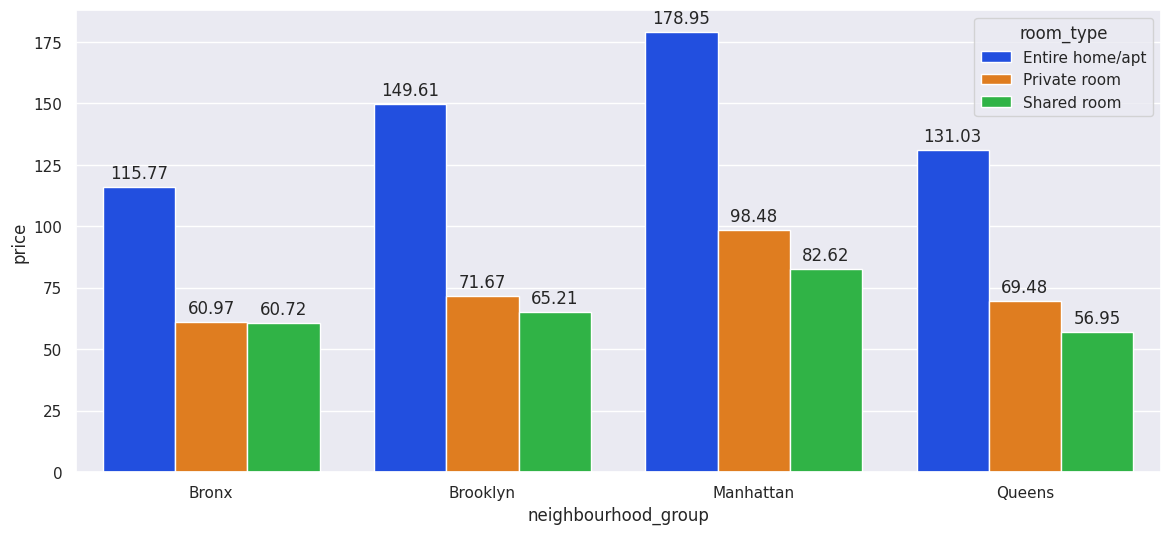

In [48]:
# # Creating a visualization for avg prices of each neighbourhood_group with different room types
import matplotlib.pyplot as plt
import seaborn as sns

# Create a bar plot
pc = sns.barplot(data=avg_pref_price, x='neighbourhood_group', y='price', hue='room_type', palette='bright')

# Add values on top of the bars
for p in pc.patches:
    pc.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Show the plot
plt.show()

###1. Why did you pick the specific chart?

**Answer:** A Bar chart makes it easy to compare and display the distribution or relationship between data points.



###2. what is /are insight(s) found from the chart?

**Answer:-**

Manhattan is the most expensive location for every room type, then Brooklyn is second the most expensive location.

In the Bronx private rooms and shared room prices are very similar, so I think everybody booked a private room, because why does a person want to live in a shared room

### 3. Will the gained insights help creating a positive business impact?
###Are there any insights that lead to negative growth? Justify with specific reason.

**Answer:** In the Bronx the prices are same the for private rooms or shared rooms, so we need to change the price of the private rooms & shared rooms, because customers are getting the same prices for private rooms & shared rooms they only go to private rooms. and for private rooms, they can charge extra so why they are giving the private rooms at the same price

###**Problem 6. neighbourhood(Area) with maximum average price.**

In [49]:
# By using groupby method will get neighbourhood with max average price
area_with_avg_price = df_without_outliers.groupby(['neighbourhood']).agg({'price':'mean'}).reset_index().sort_values(by='price')

# Changing name of dataframe columns
area_with_avg_price.rename(columns={'price':'avg.price'},inplace=True)

# show
area_with_avg_price.sort_values(by='avg.price',ascending=False)

neighbourhood   avg.price
110                   Van Nest  300.000000
84                        NoHo  205.000000
114               West Village  194.384449
105                    Tribeca  192.682540
55           Greenwich Village  182.433594
18                     Chelsea  181.062069
73                     Midtown  177.246429
45           Flatiron District  176.205128
97                        SoHo  174.859551
85                      Nolita  174.154839
3            Battery Park City  173.558824
103           Theater District  173.225806
32                       DUMBO  169.882353
57              Hell's Kitchen  165.951049
82                 Murray Hill  163.803571
52                    Gramercy  162.447619
13            Brooklyn Heights  161.800000
111               Vinegar Hill  161.631579
43          Financial District  158.777778
20                Civic Center  156.735294
24                 Cobble Hill  152.444444
41                East Village  150.491086
65                Little Italy  150.253968
29                      Corona  150.000000
108            Upper East Side  149.962709
34           Downtown Brooklyn  149.952381
9                  Boerum Hill  149.556522
28                Coney Island  149.000000
109            Upper West Side  148.551111
83                   Navy Yard  148.454545
64                    Kips Bay  145.812000
68             Lower East Side  145.096831
87                  Park Slope  143.657492
17             Carroll Gardens  142.880503
19                   Chinatown  141.859649
25                 Columbia St  141.357143
75                  Mill Basin  140.000000
99                 South Slope  138.439306
48                 Fort Greene  137.403226
116            Windsor Terrace  136.826531
106                Two Bridges  131.955556
90            Prospect Heights  128.012931
51                     Gowanus  125.735294
69             Manhattan Beach  125.000000
115               Williamsburg  123.463695
92                    Red Hook  123.117647
113                 West Farms  122.000000
23                Clinton Hill  120.818919
54                  Greenpoint  120.765583
38                 East Harlem  117.129032
89                 Port Morris  112.500000
72              Middle Village  111.062500
66            Long Island City  110.604938
100            Stuyvesant Town  110.086957
76         Morningside Heights  107.913043
8                 Bergen Beach  105.111111
56                      Harlem  103.910180
50                    Glendale  102.064516
49               Fort Hamilton  100.780488
46                   Flatlands   99.407407
1                      Astoria   98.990260
4                    Bay Ridge   98.481481
30               Crown Heights   97.828255
91   Prospect-Lefferts Gardens   97.706745
95            Roosevelt Island   96.435484
53                   Gravesend   95.500000
5           Bedford-Stuyvesant   94.884440
35               Dyker Heights   94.100000
62                  Kensington   93.702479
37               East Flatbush   93.642276
102                Sunset Park   93.345528
40               East New York   92.347826
96              Sheepshead Bay   91.645161
33            Ditmars Steinway   91.280952
60                      Inwood   90.344086
78                  Morrisania   89.833333
61             Jackson Heights   89.747368
16                    Canarsie   89.400000
79                  Mott Haven   87.657143
42                    Elmhurst   86.645669
70                     Maspeth   85.934426
112         Washington Heights   85.527778
71                     Melrose   84.888889
107         University Heights   84.444444
101                  Sunnyside   84.207921
81                  Mount Hope   84.076923
39             East Morrisania   83.750000
67                    Longwood   82.923077
44                    Flatbush   82.915138
118                   Woodside   82.875000
31               Cypress Hills   82.594937
26                   Concourse   81.368421
11              Br

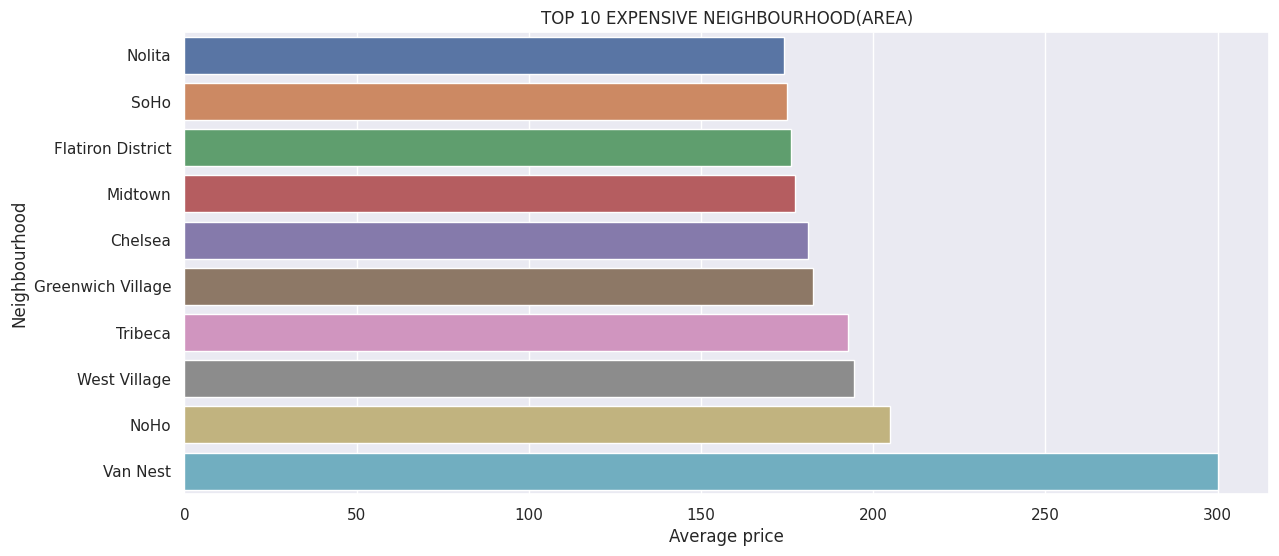

In [50]:
# Visualization
sns.barplot(data=area_with_avg_price[-10:],x='avg.price',y='neighbourhood')
plt.title('TOP 10 EXPENSIVE NEIGHBOURHOOD(AREA)')
plt.xlabel('Average price')
plt.ylabel('Neighbourhood')
plt.show()

###1. Why did you pick the specific chart?

**Answer:** A Bar chart makes it easy to compare and display the distribution or relationship between data points.

###2. what is /are insight(s) found from the chart?



**Answer:** **Van Nest** is the neighbourhood which is most the expensive neighbourhood. After that **NOHO** is the most expensive neighbourhood.

### 3. Will the gained insights help creating a positive business impact?
###Are there any insights that lead to negative growth? Justify with specific reason.

**Answer:**

###**Problem 7. Top 10 Cheap Neighbourhood(Area)**

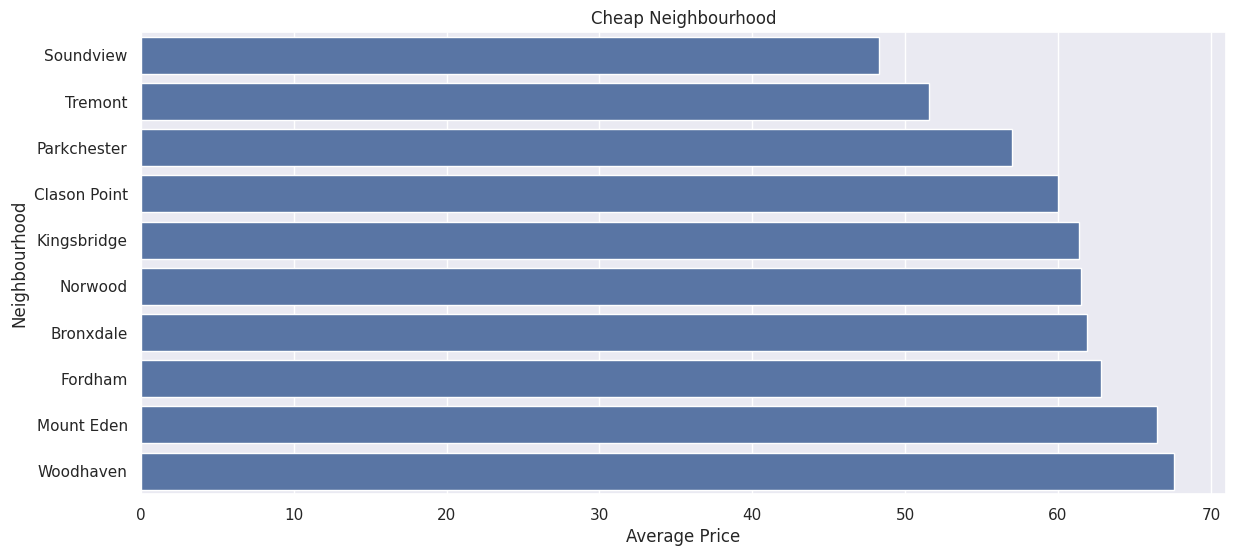

In [51]:
# Visualization
sns.barplot(x='avg.price',y='neighbourhood',data=area_with_avg_price[:10],color='b')
plt.title('Cheap Neighbourhood')
plt.xlabel('Average Price')
plt.ylabel('Neighbourhood')
plt.show()

###1. Why did you pick the specific chart?


**Answer:** A Bar chart makes it easy to compare and display the distribution or relationship between data points.

###2. what is /are insight(s) found from the chart?

**Answer:** Soundview and Tremont are the cheapest neighbourhoods.
Kingsbridge, Norwood, Bronxdale, and Fordham are the neighbourhoods whose prices are the same.

### 3. Will the gained insights help creating a positive business impact?
###Are there any insights that lead to negative growth? Justify with specific reason.

**Answer:** If somebody searching for a cheap room we can suggest these listings on those. it impacts positively the business. Because we are not losing any customer.

###**Problem 8. Where is the highest room availability in neighbourhood_groups(Location)?**

In [52]:
# printing head of dataframe
df_without_outliers.head()

id  host_id neighbourhood_group    neighbourhood  latitude  longitude  \
1   2595     2845           Manhattan          Midtown  40.75362  -73.98377   
2   3647     4632           Manhattan           Harlem  40.80902  -73.94190   
4   5022     7192           Manhattan      East Harlem  40.79851  -73.94399   
10  5295     7702           Manhattan  Upper West Side  40.80316  -73.96545   
19  7750    17985           Manhattan      East Harlem  40.79685  -73.94872   

          room_type  price  minimum_nights  number_of_reviews  \
1   Entire home/apt    225               1                 45   
2      Private room    150               3                  0   
4   Entire home/apt     80              10                  9   
10  Entire home/apt    135               5                 53   
19  Entire home/apt    190               7                  0   

    reviews_per_month  calculated_host_listings_count  availability_365  
1                0.38                               2               355  
2                0.00                               1               365  
4                0.10                               1                 0  
10               0.43                               1                 6  
19               0.00                               2               249

In [53]:
# Creating data frame
avai_neigh = df_without_outliers.groupby('neighbourhood_group')['availability_365'].count()

# Printing
avai_neigh

neighbourhood_group
Bronx          357
Brooklyn     12876
Manhattan    11967
Queens        2131
Name: availability_365, dtype: int64

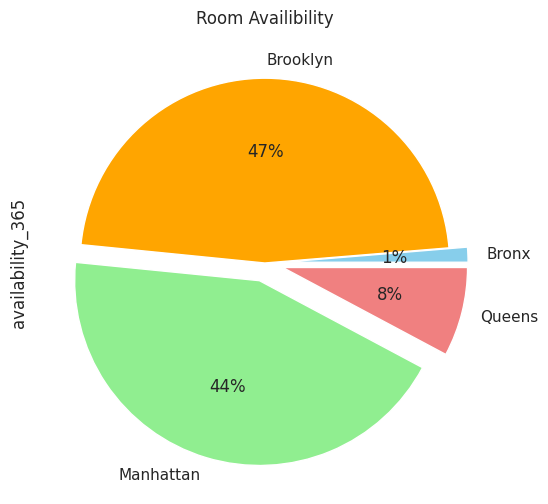

In [54]:
# signing explode
exp = [0.1,0,0.1,0.1]

# Custom colors
custom_colors = ['skyblue', 'orange', 'lightgreen', 'lightcoral']

# Visualization
avai_neigh.plot(kind='pie',autopct='%.0f%%',explode=exp, colors=custom_colors)
plt.title('Room Availibility')
plt.show()

###1. Why did you pick the specific chart?

**Answer:-** A pie chart is useful to visually represent the proportional distribution of categories in a whole, making it easy to understand the relative sizes of different parts within a dataset at a glance. It is effective for displaying simple data compositions.

###2. what is /are insight(s) found from the chart?

**Answer:** In Manhattan and Brooklyn more room availability is.

### 3. Will the gained insights help creating a positive business impact?
###Are there any insights that lead to negative growth? Justify with specific reason.

**Answer:**

###**Problem 9. Relation Between Price variable with another variable.**
###minimum_nights
###number_of_reviews
###reviews_per_month
###calculated_host_listings_count





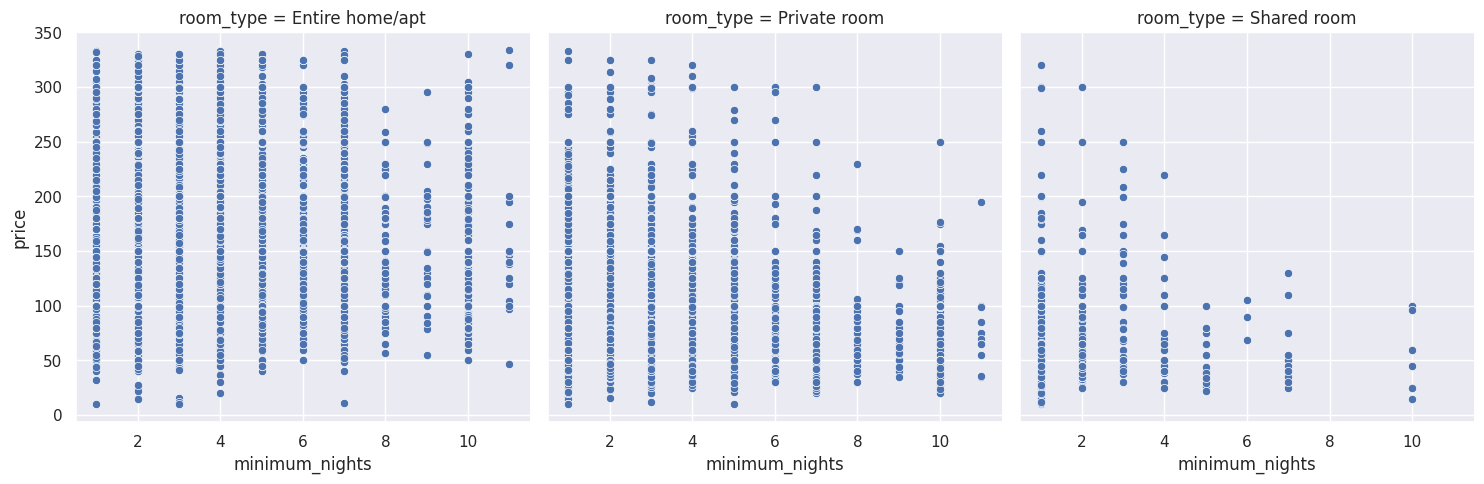

In [55]:
# minimum_nights v/s price
sns.relplot(x='minimum_nights',y='price',data=df_without_outliers,col='room_type')
plt.show()

###1. Why did you pick the specific chart?

**Answer:** This chart shows the relation between two continuous feature.

###2. what is /are insight(s) found from the chart?

**Answer:** I can see in the charts that home/apartment prices are the same, no matter how many nights you stay. but in a shared room, we can see as the nights increase price decreases, maybe because the host is giving discounts to those who are staying more days.

### 3. Will the gained insights help creating a positive business impact?
###Are there any insights that lead to negative growth? Justify with specific reason.

**Answer:**

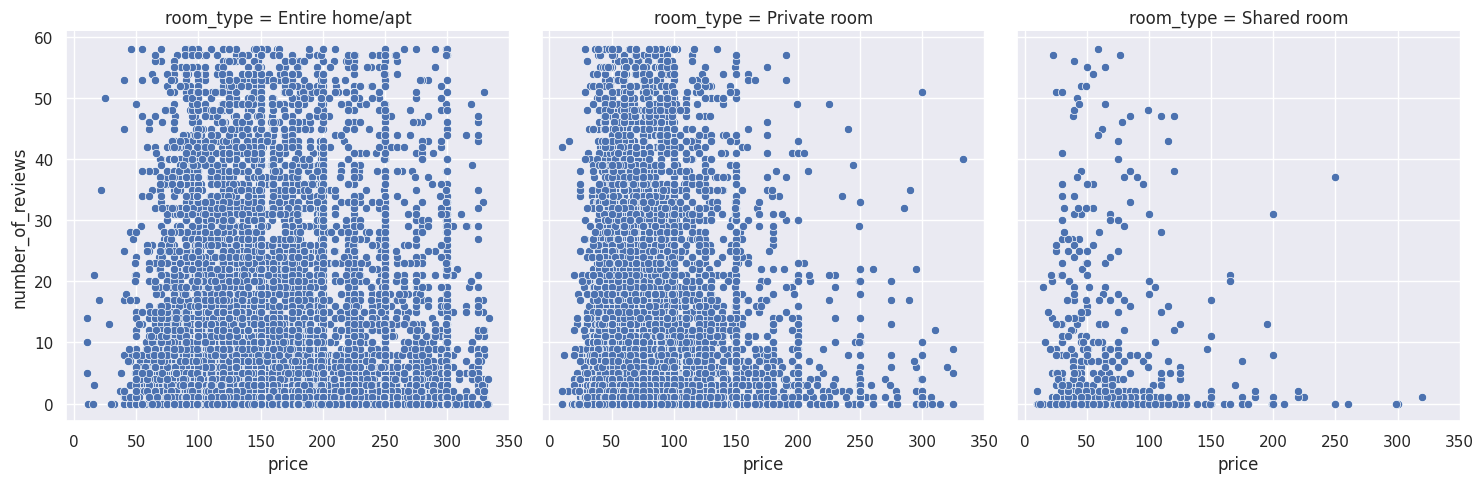

In [56]:
# number_of_reviews v/s price
sns.relplot(y='number_of_reviews',x='price',data=df_without_outliers,col='room_type')
plt.show()

###1. Why did you pick the specific chart?

**Answer:** This chart shows the relation between two continuous feature.

###2. what is /are insight(s) found from the chart?

**Answer:** I can see in this chart where the price is low where the number of reviews is high, which means customers only prefer those private rooms and homes that are low in price.

### 3. Will the gained insights help creating a positive business impact?
###Are there any insights that lead to negative growth? Justify with specific reason.

**Answer:**

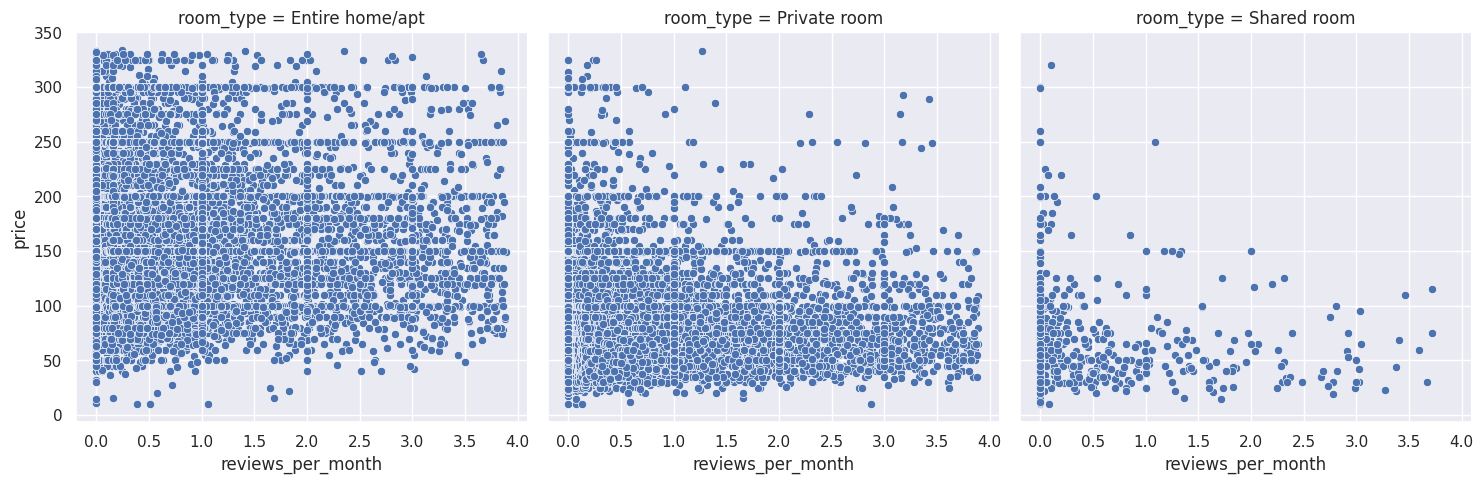

In [57]:
# reviews_per_month v/s price
sns.relplot(x='reviews_per_month',y='price',data=df_without_outliers,col='room_type')
plt.show()

###1. Why did you pick the specific chart?

**Answer:** This chart shows the relation between two continuous feature.

###2. what is /are insight(s) found from the chart?

**Answer:** In Those listings where prices are low reviews are coming but where prices are high the number of reviews is less.

### 3. Will the gained insights help creating a positive business impact?
###Are there any insights that lead to negative growth? Justify with specific reason.

**Answer:**


## **10. Pair Plot**

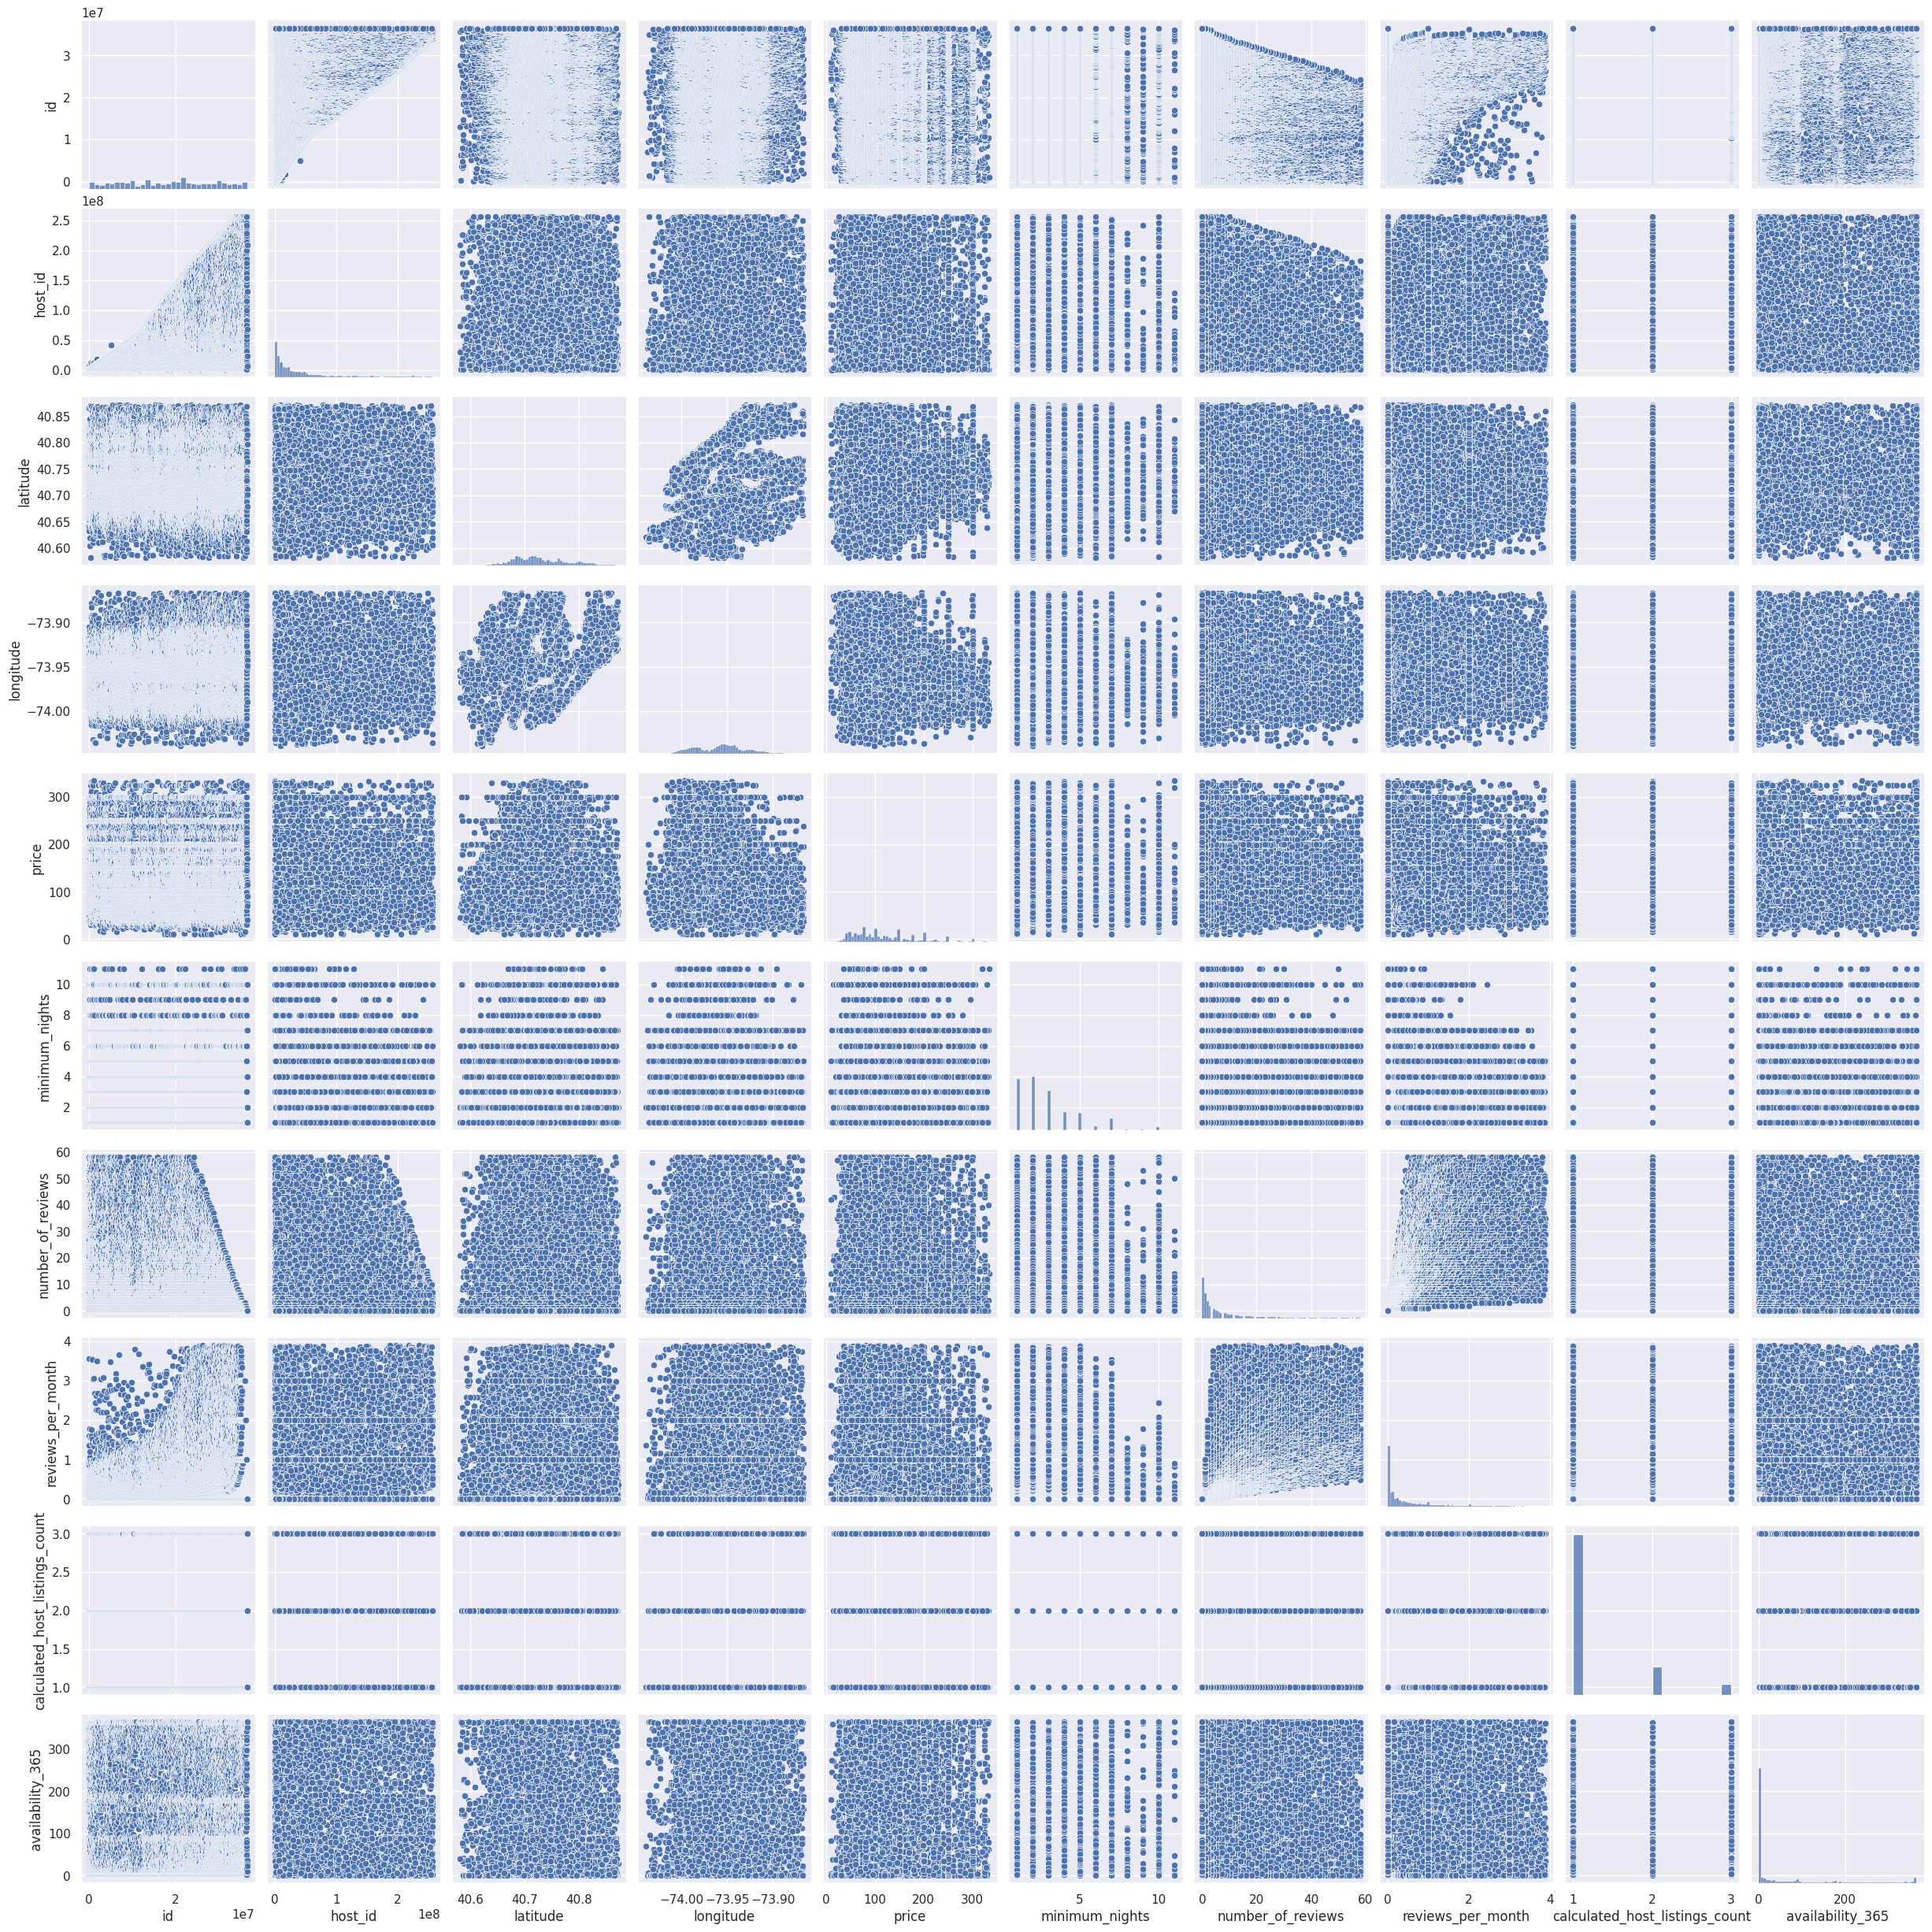

In [60]:
# Create a pair plot
sns.pairplot(df_without_outliers, markers=["o", "s", "D"])

# Show the plot
plt.show()

# **Solution to Business Objective**



####What do you suggest the client to achieve Business Objective?
Explain Briefly.

#####**Answer:**

First need to focus on the neighbourhood_group variable because here Bronx have low listings and queens also. so these locations need to increase listings. because if on rush days these locations do not have many rooms then customers would go on another platform. And it's not good for business.


Second need to check whether this all-time room available or not. because customers want a room and AirBnb does not provide thier room. then it will affect business .

# **Conclusion**

*  Variables number_of_reviews and reviews_per_month correlate to each other.

*  The Highest listing done by a host is 3.

*  Manhattan and Brooklyn have the most listings on Airbnb, Brooklyn has 47% and Manhattan has 44%. And both locations visit a lot of customers.

*  Room type(entire_home/apt, private_room) is the most listed on all of the locations, in Manhattan (entire room/apt) is listed more & private rooms is less. In Brooklyn private rooms are listed high compare to entire home/apt.

*  Queens and Bronx have very less listings.

*  Neighbourhood_group Brookyln has most of the listings in Williamsburg 2782 & Bedford-Stuyvesant 2198.

*  Manhattan is the most expensive for all categories of room.

*  In all neighbourhood_group the most expensive room_type is that entire_home, apt.

*  The Most expensive area is Van Nest of Bronx and second most expensive area is NaHO of Manhattan.

*  The very cheap areas are soundview and tremont is from Bronx.

*  As we know the highest room is listed in Manhattan and Brooklyn and the room availability is also high in these locations.


*  The most expensive and very affordable in both areas are from the Bronx.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***